In [21]:
import numpy as np
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import random
from numpy import genfromtxt
import matplotlib.pyplot as plt

def get_data():
    data=load_svmlight_file(r"D:\australian_scale.txt")
    return data[0],data[1]

def  batchGradientDescent(X_train, y_train,x_test,y_test,constant, theta, alpha, maxIterations):
    '''
    目标函数: obj(<X,y>, W) = (对所有<X,y>C*SUM{max{0, 1 - W*X*y}}) + 1 / 2 * ||W||^2, 即：hinge+L2
    '''
    n_train=X_train.shape[1]
    n_test=X_test.shape[1]
    m_train=X_train.shape[0]
    m_test=X_test.shape[0]
    Jtest_history=np.zeros(maxIterations)
    J_history    =np.zeros(maxIterations)
    accuracy     =np.zeros(maxIterations+1)
    theta=np.zeros((n_train,1))
    X=np.zeros((1,n_train))
    grad=np.zeros((n_train,1))#G
    gradi=np.zeros((n_train,1))
    bias=0
    biasi=0
    b_grad=0
    for i in range(maxIterations):#maxIterations=50
        J_history[i]    =computerLoss(X_train,y_train,theta,constant,bias)
        Jtest_history[i]=computerLoss(X_test,y_test,theta,constant,bias)
        accuracy[i+1]=accuracyrate(X_test,y_test,theta,constant,bias)
        #每次迭代随机选择一个训练样本
        for index in range(m_train):#517 sample
            y = y_train[index]# y is label
            X=X_train[index]#get the 15 feature of lab
        #计算梯度
            WX =X.dot(theta)+bias#WX is a constant
            Xtrans=X.transpose()
            if 1 - WX *y >=0:
                biasi=-y
                gradi=-y*Xtrans#When 1-WX *y > 0,the gradient of C*SUM{max{0, 1 - W*X*y}}=-y*X
                grad=grad+gradi
                b_grad=b_grad+biasi
        # When 1-WX *y <= 0，目标函数的前半部分恒等于0, 梯度也是0 ,C*SUM{max{0, 1 - W*X*y}} =0
        #update theta, alpha is learning rate
        b_grad=constant*b_grad
        gradsum=(constant*grad+theta)#C*SUM{max{0, - X*y}}+W
        theta =theta - alpha * (gradsum/m_train)#/m_train
        bias=bias-alpha*(b_grad/m_train)#
    return theta,bias,J_history,Jtest_history,accuracy
def computerLoss(X,y,theta,constant,b):
    m=X.shape[0]
    R=1.0/2*np.sum(np.square(theta))#1 / 2 * ||W||^2
    result=0
    resultsum=0
    Xi=np.zeros((1,n))
    for index in range(m):#517 sample
        yi = y_train[index]; # y is label
        Xi=X[index]
        WX =Xi.dot(theta)+b
        result=1-WX*yi
        if result > 0:#When 1-WX *y > 0,the gradient of {max{0, 1 - W*X*y}}=1 - W*X*y
            resultsum=resultsum+result
    #J=R+resultsum#对所有<X,y>C*SUM{max{0, 1 - W*X*y}}) + 1 / 2 * ||W||^2, 即：hinge+L2
    J=R+constant*resultsum
    return J
def accuracyrate(X,y,theta,constant,b):
    m=X.shape[0]
    result=np.zeros_like((y))
    count=0
    accuracy=0
    for index in range(m):#517 sample
        yi = y[index] # y is label
        Xi=X[index]
        WX =Xi.dot(theta)+b
        result=WX-0
        if result > 0:#When 1-WX *y > 0,the gradient of {max{0, 1 - W*X*y}}=1 - W*X*y
            if yi==1:
                count=count+1
        else:
            if yi==-1:
                count=count+1
    accuracy=1.0*count/m
    return accuracy

result [-1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.
  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.
  1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.]
y_test [ 1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.

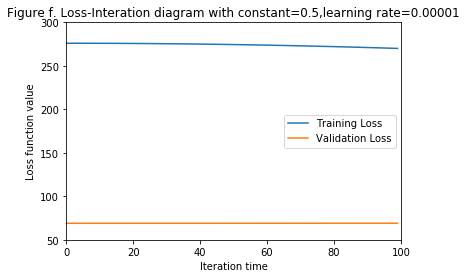

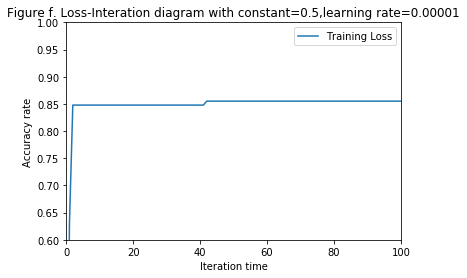

In [24]:
#first
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
n=X_train.shape[0]
constant=0.5
theta=np.zeros((n,1))
alpha = 0.00001
maxIteration = 100
Cost_Jtest=np.zeros(maxIteration)
Cost_J    =np.zeros(maxIteration)
accuracy=np.zeros(maxIteration+1)
b=0
theta,b,Cost_J,Cost_Jtest,accuracy= batchGradientDescent(X_train,y_train,X_test, y_test,constant,theta, alpha, maxIteration)
#print("Cost_Jtest",Cost_Jtest)
#print("accuracy",accuracy)
#print("Cost_J",Cost_J)
m=y_test.shape[0]
result=np.zeros_like((y_test))
for index in range(m):#517 sample
        Xi=X[index]
        WX =Xi.dot(theta)+b
        resultall=WX-0
        if resultall > 0:#When 1-WX *y > 0,the gradient of {max{0, 1 - W*X*y}}=1 - W*X*y
             result[index]=1
        else:
            result[index]=-1
print("result",result.transpose())
print("y_test",y_test.transpose())
%matplotlib inline
plt.xlim(0,100)
plt.ylim(50,300)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=0.5,learning rate=0.00001')
plt.legend()
plt.show()

plt.xlim(0,100)
plt.ylim(0.6,1)
plt.plot(accuracy,label='Training Loss')
#plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Accuracy rate')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=0.5,learning rate=0.00001')
plt.legend()
plt.show()



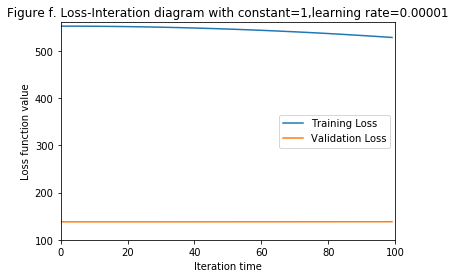

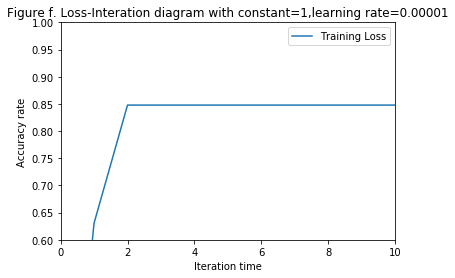

In [14]:
#second
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
n=X_train.shape[0]
constant=1
theta=np.zeros((n,1))
alpha = 0.00001
maxIteration = 100
Cost_Jtest=np.zeros(maxIteration)
Cost_J    =np.zeros(maxIteration)
accuracy=np.zeros(maxIteration+1)
theta,Cost_J,Cost_Jtest,accuracy= batchGradientDescent(X_train,y_train,X_test, y_test,constant,theta, alpha, maxIteration)
#print("Cost_Jtest",Cost_Jtest)
#print("accuracy",accuracy)
#print("Cost_J",Cost_J)
%matplotlib inline
plt.xlim(0,100)
plt.ylim(100,560)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.00001')
plt.legend()
plt.show()

plt.xlim(0,10)
plt.ylim(0.6,1)
plt.plot(accuracy,label='Training Loss')
#plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Accuracy rate')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.00001')
plt.legend()
plt.show()

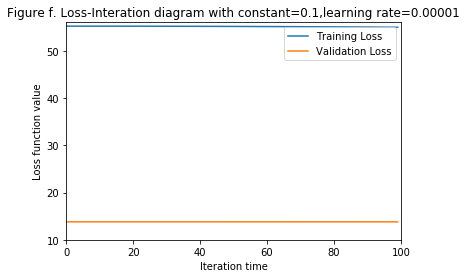

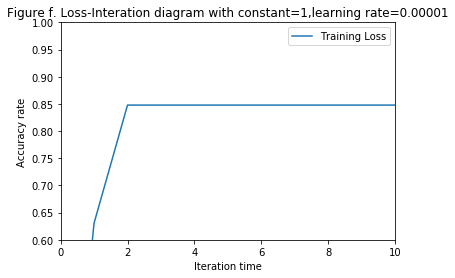

In [13]:
##third
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
n=X_train.shape[0]
constant=0.1
theta=np.zeros((n,1))
alpha = 0.00001
maxIteration = 100
Cost_Jtest=np.zeros(maxIteration)
Cost_J    =np.zeros(maxIteration)
accuracy=np.zeros(maxIteration+1)
theta,Cost_J,Cost_Jtest,accuracy= batchGradientDescent(X_train,y_train,X_test, y_test,constant,theta, alpha, maxIteration)
#print("Cost_Jtest",Cost_Jtest)
#print("accuracy",accuracy)
#print("Cost_J",Cost_J)
%matplotlib inline
plt.xlim(0,100)
plt.ylim(10,56)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=0.1,learning rate=0.00001')
plt.legend()
plt.show()

plt.xlim(0,10)
plt.ylim(0.6,1)
plt.plot(accuracy,label='Training Loss')
#plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Accuracy rate')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.00001')
plt.legend()
plt.show()

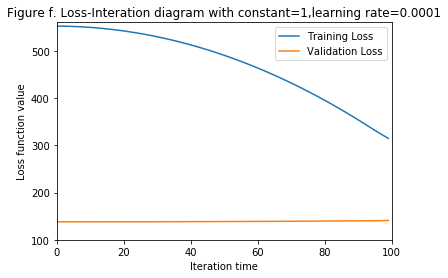

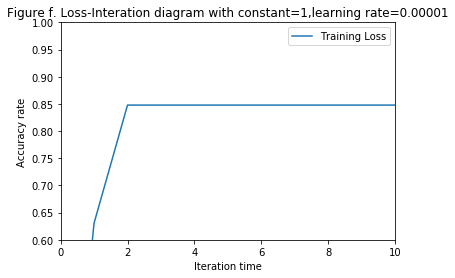

In [12]:
##frouth
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
n=X_train.shape[0]
constant=1
theta=np.zeros((n,1))
alpha = 0.0001
maxIteration = 100
Cost_Jtest=np.zeros(maxIteration)
Cost_J    =np.zeros(maxIteration)
accuracy=np.zeros(maxIteration+1)
theta,Cost_J,Cost_Jtest,accuracy= batchGradientDescent(X_train,y_train,X_test, y_test,constant,theta, alpha, maxIteration)
#print("Cost_Jtest",Cost_Jtest)
#print("accuracy",accuracy)
#print("Cost_J",Cost_J)
%matplotlib inline
plt.xlim(0,100)
plt.ylim(100,560)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.0001')
plt.legend()
plt.show()

plt.xlim(0,10)
plt.ylim(0.6,1)
plt.plot(accuracy,label='Training Loss')
#plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Accuracy rate')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.00001')
plt.legend()
plt.show()

Cost_Jtest [ 138.          138.0050165   138.0150521   138.03011202  138.05020409
  138.07533878  138.10552913  138.14079084  138.18114219  138.2266041
  138.2772001   138.33295633  138.39390155  138.46006712  138.53148705
  138.60819792  138.69023897  138.77765202  138.87048152  138.96877454
  139.07258075  139.18195246  139.29694457  139.4176146   139.54402271
  139.67623163  139.81430675  139.95831604  140.10833011  140.26442218
  140.48075707  140.95016713  141.59216133  142.86535421  144.5712424
  146.54574168  148.59846908  150.67604715  152.80290592  154.95635446
  157.12547965  159.34439086  161.62923133  163.97644312  166.44979137
  168.98297603  171.54010567  174.12491259  176.77268545  179.50472008
  182.31645686  185.15168837  188.0223338   190.91783027  193.84205837
  196.78277717  199.75468709  202.75148283  205.76479022  208.79024535
  211.8140245   214.83563695  217.85493716  220.87178586  223.88582132
  226.89703982  229.90533491  232.91049672  235.91245677  238.920412

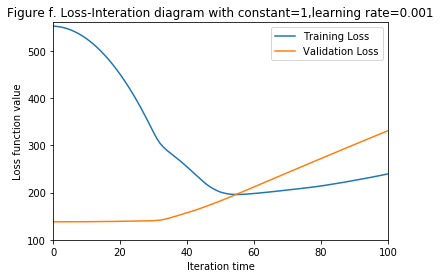

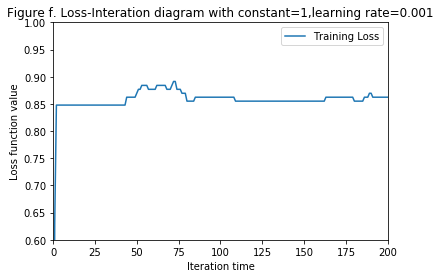

In [7]:
#fifth
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
n=X_train.shape[0]
constant=1
theta=np.zeros((n,1))
alpha = 0.001
maxIteration = 200
Cost_Jtest=np.zeros(maxIteration)
Cost_J    =np.zeros(maxIteration)
accuracy=np.zeros(maxIteration+1)
theta,Cost_J,Cost_Jtest,accuracy= batchGradientDescent(X_train,y_train,X_test, y_test,constant,theta, alpha, maxIteration)
#print("Cost_Jtest",Cost_Jtest)
#print("accuracy",accuracy)
#print("Cost_J",Cost_J)
%matplotlib inline
plt.xlim(0,100)
plt.ylim(100,560)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.001')
plt.legend()
plt.show()

plt.xlim(0,200)
plt.ylim(0.6,1)
plt.plot(accuracy,label='Training Loss')
#plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Accuracy rate')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.001')
plt.legend()
plt.show()

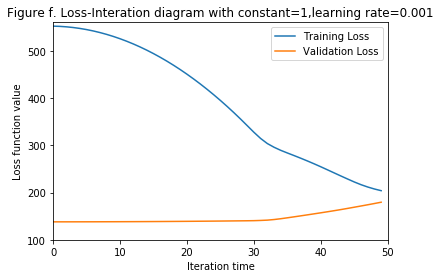

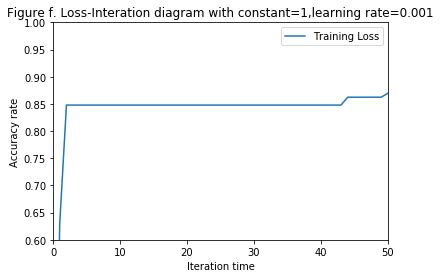

In [11]:
#sixth
X,y=get_data()
X=X.todense()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
n=X_train.shape[0]
constant=1
theta=np.zeros((n,1))
alpha = 0.001
maxIteration = 50
Cost_Jtest=np.zeros(maxIteration)
Cost_J    =np.zeros(maxIteration)
accuracy=np.zeros(maxIteration+1)
theta,Cost_J,Cost_Jtest,accuracy= batchGradientDescent(X_train,y_train,X_test, y_test,constant,theta, alpha, maxIteration)
%matplotlib inline
plt.xlim(0,50)
plt.ylim(100,560)
plt.plot(Cost_J,label='Training Loss')
plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Loss function value')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.001')
plt.legend()
plt.show()

plt.xlim(0,50)
plt.ylim(0.6,1)
plt.plot(accuracy,label='Training Loss')
#plt.plot(Cost_Jtest,label='Validation Loss')
plt.ylabel('Accuracy rate')
plt.xlabel('Iteration time')
plt.title('Figure f. Loss-Interation diagram with constant=1,learning rate=0.001')
plt.legend()
plt.show()
